# Experiment 3 - Fingerprint Segmentation


---

Reyansh Gupta, A023, B.Tech CE B1

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def read_image(image_path):
    image = cv2.imread(image_path)
    image_res = cv2.resize(image,(0,0), fx=0.1,fy=0.1)
    image = image_res[150:320, 100:250]
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
def create_mask(image):
    image_ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    dim1, dim2 = image_ycrcb.shape[:2]
    x, y = np.meshgrid(range(dim2), range(dim1))
    features = np.reshape(image_ycrcb, (dim1 * dim2, 3))
    features = np.concatenate((features, x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    features_mean = np.mean(features, axis=0)
    features_std = np.std(features, axis=0)
    features_normalized = (features - features_mean) / features_std
    spatial_weight = 0.1
    features_normalized[:, -2:] *= spatial_weight
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(features_normalized)
    labels = kmeans.labels_
    mask = labels.reshape((dim1, dim2))
    if mask[0, 0] == 0:
        mask = 1 - mask
    return mask

In [8]:
def apply_mask(image, mask):
    masked_image = np.copy(image)
    masked_image[mask == 1] = [0, 0, 0]
    return masked_image

In [9]:
image_path = '/content/drive/MyDrive/NMIMS/Biometrics/Fingerprint.jpg'
image = read_image(image_path)
mask = create_mask(image)
masked_image = apply_mask(image, mask)

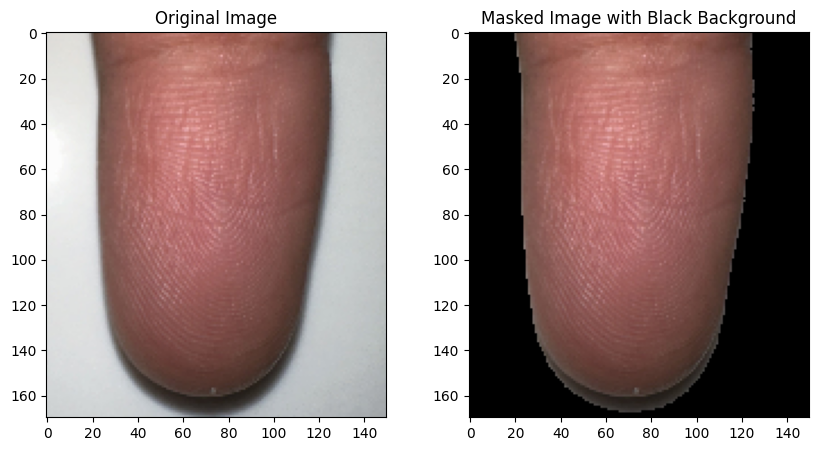

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title("Masked Image with Black Background")
plt.show()

# Conclusion


---

Learned how to apply image processing techniques to remove the background and segment an image to show just the fingerprint